In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

4. Definir la frecuencia de muestreo para la siguiente señal y obtener las muestras de 10 segundos de la señal usando Colab (10%)


Para el grupo de Juliana:
x(t)= 4 ∗sen(40πt + (π /4))+ k ∗ cos(80πt)+ 5 Con k = 2(a+1) con a = último número de la cédula

In [10]:
Fs=10
T = 1/Fs # Periodo de muestreo
t = np.arange(0, 80+T, T)

x1 = 4*np.sin(40*np.pi*t+(np.pi/4))
x2= 4*np.cos(80*np.pi*t)
x = x1+x2+5

muestras=[]
for i in range(10):
  muestras.append(x[i])
print(muestras)


[11.82842712474619, 11.828427124746192, 11.82842712474619, 11.828427124746199, 11.828427124746177, 11.828427124746176, 11.828427124746215, 11.828427124746213, 11.82842712474617, 11.82842712474617]


7. Una señal fisiológica definida en el rango entre a Hz y b Hz se toma con frecuencia de muestreo
de 100 Hz. Para esta señal:

• Diseñar el filtro pasa-altas teniendo en cuenta que se requiere que en la banda de rechazo
la señal de salida sea por lo menos 10 veces menor en amplitud a la señal de entrada
(10%)



• Diseñar el filtro pasa-bajas teniendo en cuenta que se requiere que en la banda de rechazo
la señal de salida sea por lo menos 100 veces menor en amplitud a la señal de entrada
(10%)


In [15]:
Fs=100
Fs = 100
nyquist = Fs / 2  # frecuencia de nyquist
a = 15 / nyquist
b = 45 / nyquist
ordenHP = int(3.3 / (a / Fs))  # Con ventana hamming, convertir a entero
ordenLP = int(3.3 / (b / Fs))  # Con ventana hamming, convertir a entero

highpass_fir = signal.firwin(ordenHP+1,a, pass_zero = 'highpass',window='hamming') #filtro pasa altas
lowpass_fir = signal.firwin(ordenLP+1,b, pass_zero = 'lowpass',window='hamming') #filtro pasabajas

Graficar diagrama de magnitud y fase (10%)

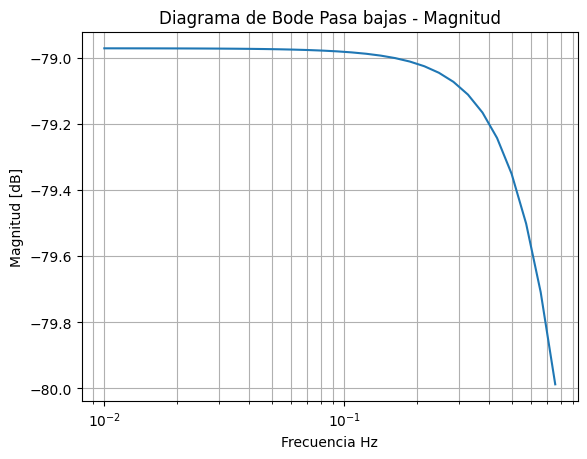

In [20]:
#Diagrama de bode para determinar si el orden es correcto
system = signal.TransferFunction(lowpass_fir, 1)
#
# Crear el diagrama de Bode
w, mag, phase = signal.bode(system)
frec=w*Fs/(2*np.pi)

# Graficar Magnitud
plt.figure()
plt.semilogx(w[0:32], mag[0:32])
plt.title('Diagrama de Bode Pasa bajas - Magnitud')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Magnitud [dB]')
plt.grid(which='both', axis='both')
plt.show()

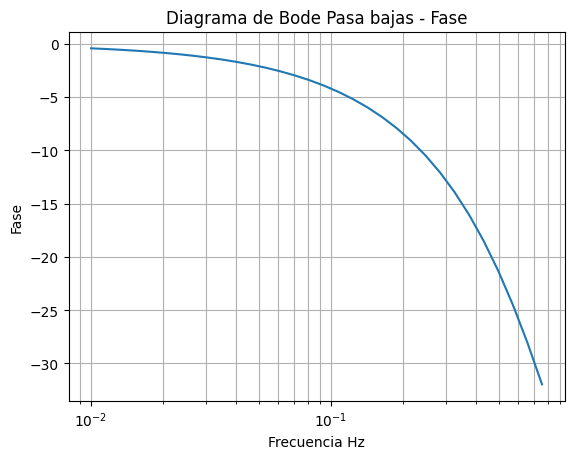

In [21]:
# Graficar Fase
plt.figure()
plt.semilogx(w[0:32], phase[0:32])
plt.title('Diagrama de Bode Pasa bajas - Fase')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Fase')
plt.grid(which='both', axis='both')
plt.show()

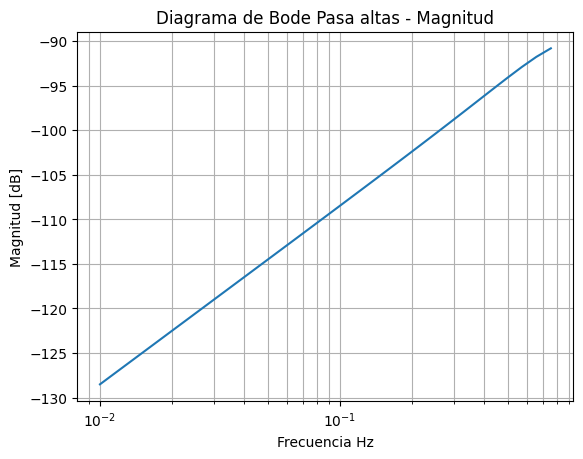

In [22]:
#Diagrama de bode para determinar si el orden es correcto
system = signal.TransferFunction(highpass_fir, 1)
#
# Crear el diagrama de Bode
w, mag, phase = signal.bode(system)
frec=w*Fs/(2*np.pi)

# Graficar Magnitud
plt.figure()
plt.semilogx(w[0:32], mag[0:32])
plt.title('Diagrama de Bode Pasa altas - Magnitud')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Magnitud [dB]')
plt.grid(which='both', axis='both')
plt.show()

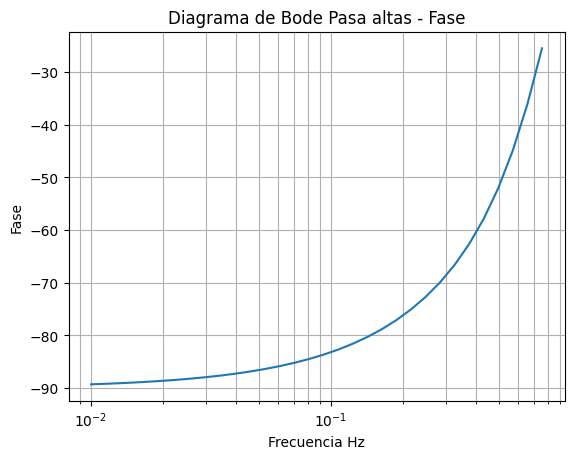

In [23]:
# Graficar Fase
plt.figure()
plt.semilogx(w[0:32], phase[0:32])
plt.title('Diagrama de Bode Pasa altas - Fase')
plt.xlabel('Frecuencia Hz')
plt.ylabel('Fase')
plt.grid(which='both', axis='both')
plt.show()